# Model Analytics II
## LinearModels_Trees_handson


Spring 2018 - Prof. Foster Provost

Teacher Assistant: Nicholas Garcia

***

Import all of the packages we will need.

In [28]:
# Import the libraries we will be using
import os
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from dstools import data_tools
from IPython.display import Image


import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 12


## Sklearn Surface for many features

http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

In [2]:

# Load data

#data= pd.read_csv("data/ads_dataset.tsv", sep='\t')
#target_name = 'isbuyer'

data= pd.read_csv("data/cell2cell_data_80_percent.csv")
target_name = 'churndep'

# Drop NaN and shuffle
data = data.dropna(axis=1)
data = data.dropna(axis=0)
data = data.sample(frac=1).reset_index(drop=True)

# Split target and features
X = data.drop([target_name], axis=1)
Y = data[target_name]

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.01)
X_train.tail()



/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls
20122,82.79,16.00,16.00,19,297,1,0,0,0,0,0
996,29.99,0.00,0.00,12,347,1,1,0,0,1,0
26766,49.99,15.33,8.33,22,661,0,1,0,1,1,0
9594,52.68,10.33,8.33,23,546,1,0,0,0,1,0
26211,30.26,4.00,0.33,10,317,1,0,0,0,1,0


In [3]:
c_penalization = 0.1
model = LogisticRegression(C=c_penalization,penalty='l2')

In [4]:
DL=list(data)
DL

['revenue',
 'outcalls',
 'incalls',
 'months',
 'eqpdays',
 'webcap',
 'marryyes',
 'travel',
 'pcown',
 'creditcd',
 'retcalls',
 'churndep']

In [5]:
model.fit(X,Y)
CL=model.coef_
CL

array([[ 9.51201843e-04,  1.55023371e-04, -3.72828757e-03,
        -1.06565862e-02,  1.02684436e-03, -2.47564117e-01,
        -3.55468305e-02, -4.71137945e-02, -1.54357420e-02,
        -1.05469657e-01,  7.05974591e-01]])

In [6]:
# Pairs of features to plot

variable = 4

variables_list = [[variable,variable-1],[variable,0],[variable,variable+4],[variable,variable+6]]


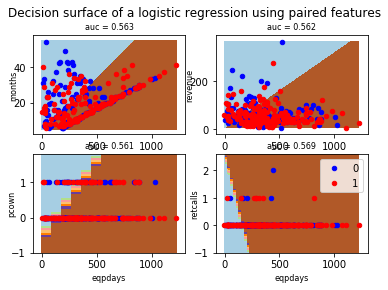

In [7]:

# Look at pairwise plots of decision surface

data_tools.decision_surface_modified(X_train, Y_train, model, variables_list, plot_step = 0.4)



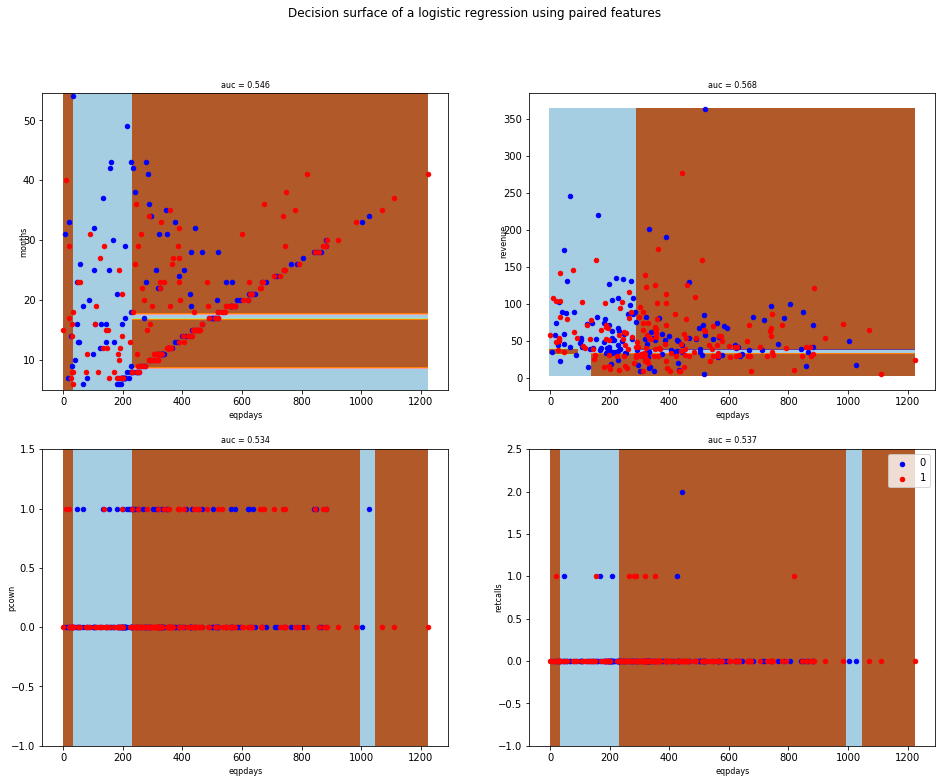

In [20]:
# Model with trees

depth_selected = 3
my_tree = DecisionTreeClassifier(max_depth=depth_selected)

data_tools.decision_surface_modified(X_train, Y_train, my_tree, variables_list, plot_step = 0.5)


In [23]:
# A function that gives a visual representation of the decision tree
def Decision_Tree_Image(decision_tree, feature_names, name="tree"):
    
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree, out_file='images/' + name + '.dot', 
                                    feature_names=feature_names)
        
    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    # to get this part to actually work, you may need to open a terminal window in Jupyter and run the following command "sudo apt install graphviz"
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

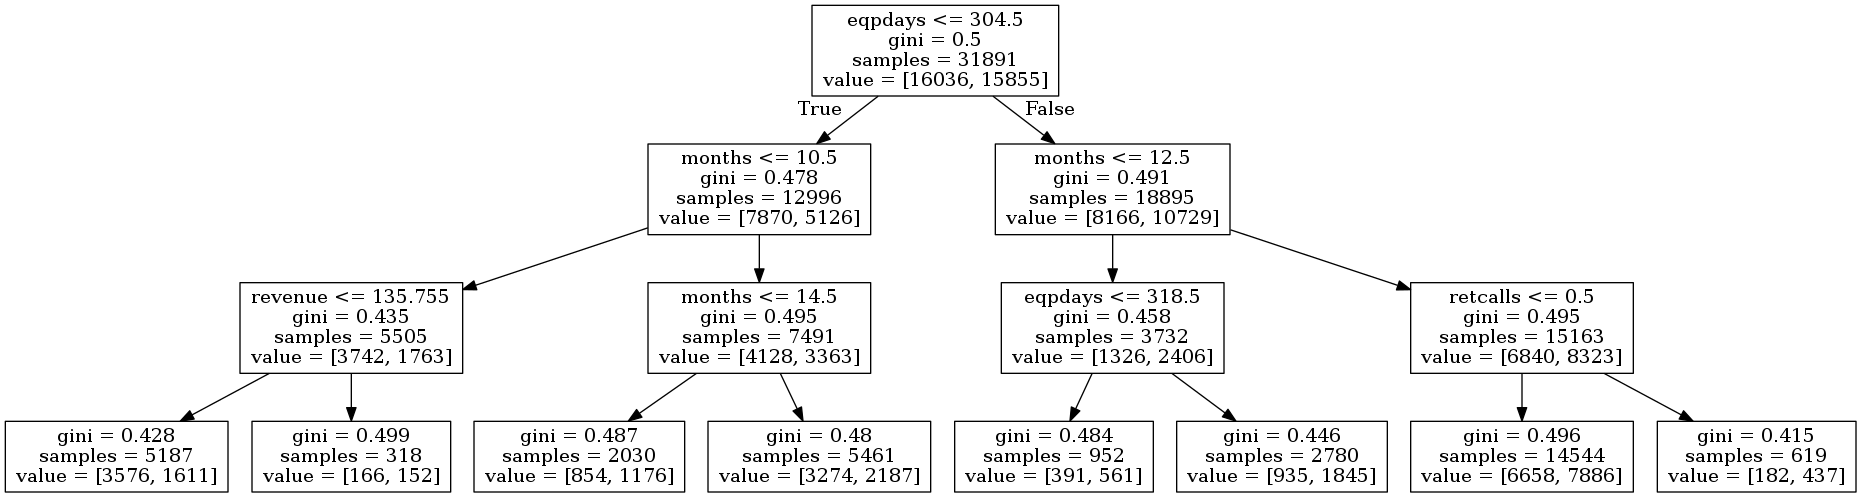

In [29]:
#my_tree.fit(X_train, Y_train)
my_tree.fit(X, Y)
#data_tools.
Decision_Tree_Image(my_tree, X_train.columns)